In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix ,accuracy_score , classification_report
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split , GridSearchCV

In [3]:
path = "covertype.csv"
df = pd.read_csv(path)

columns_names = ['Elevation','Aspect','Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology','Horizontal_Distance_To_Hydrology','Hillshade_9am','Hillshade_Noon','Hillshade_3pm','Horizontal_Distance_To_Fire_Point'] + [f'Wilderness_Area_{i}' for i in range(1,5)] +[f'Soil_Type{i}' for i in range(1 ,41)] + ['Cover_Type']
# Naming Columns
df.columns = columns_names 
# First 10 rows 
df.head(10)


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Hydrology,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Point,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
5,2579,132,6,300,-15,67,230,237,140,6031,...,0,0,0,0,0,0,0,0,0,2
6,2606,45,7,270,5,633,222,225,138,6256,...,0,0,0,0,0,0,0,0,0,5
7,2605,49,4,234,7,573,222,230,144,6228,...,0,0,0,0,0,0,0,0,0,5
8,2617,45,9,240,56,666,223,221,133,6244,...,0,0,0,0,0,0,0,0,0,5
9,2612,59,10,247,11,636,228,219,124,6230,...,0,0,0,0,0,0,0,0,0,5


In [4]:
numerical_features = ['Elevation','Aspect','Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology','Horizontal_Distance_To_Hydrology','Hillshade_9am','Hillshade_Noon','Hillshade_3pm','Horizontal_Distance_To_Fire_Point']

In [5]:
df.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Hydrology,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Point,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                             Non-Null Count   Dtype
---  ------                             --------------   -----
 0   Elevation                          581012 non-null  int64
 1   Aspect                             581012 non-null  int64
 2   Slope                              581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology   581012 non-null  int64
 4   Vertical_Distance_To_Hydrology     581012 non-null  int64
 5   Horizontal_Distance_To_Hydrology   581012 non-null  int64
 6   Hillshade_9am                      581012 non-null  int64
 7   Hillshade_Noon                     581012 non-null  int64
 8   Hillshade_3pm                      581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Point  581012 non-null  int64
 10  Wilderness_Area_1                  581012 non-null  int64
 11  Wilderness_Area_2                  581012 non-null  int64
 12  Wi

In [7]:
df.isnull().sum().sum()

np.int64(0)

In [8]:
df.shape

(581012, 55)

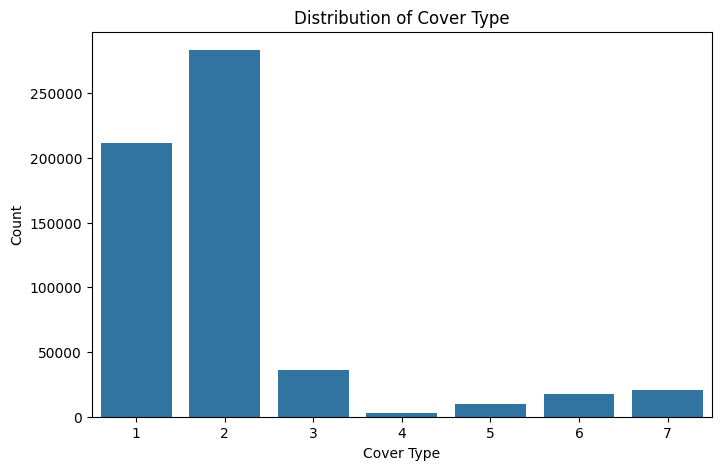

In [9]:
plt.figure(figsize=(8, 5))
cover_type_counts = df['Cover_Type'].value_counts().sort_index()
sns.barplot(x= cover_type_counts.index ,y= cover_type_counts.values)
plt.title("Distribution of Cover Type")
plt.xlabel("Cover Type")
plt.ylabel("Count")
plt.show()

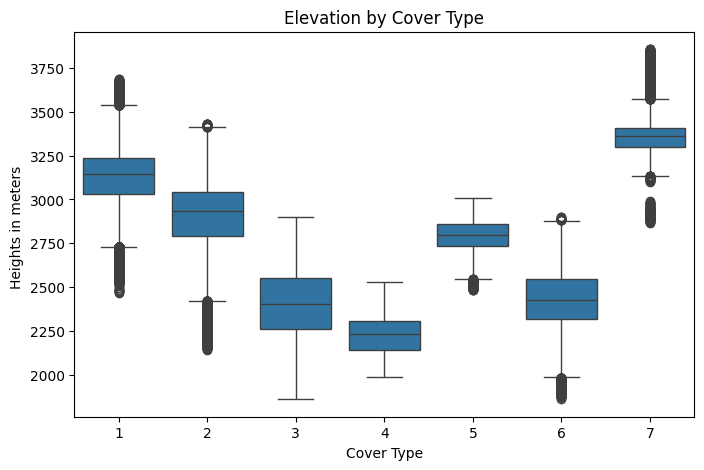

In [10]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="Cover_Type" ,y = "Elevation", data = df)
plt.title("Elevation by Cover Type")
plt.xlabel("Cover Type")
plt.ylabel("Heights in meters ")
plt.show()

In [11]:
X = df.drop('Cover_Type' ,axis = 1)
y = df['Cover_Type']

In [12]:
y = y-1

In [13]:
X_train , X_test ,y_train , y_test = train_test_split(X, y ,random_state= 42 ,test_size=0.2,stratify=y)


In [14]:
scaler = StandardScaler()
X_train[numerical_features] =scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features]= scaler.fit_transform(X_test[numerical_features]) 

In [15]:
rf = RandomForestClassifier(n_estimators=100 ,n_jobs=-1,max_depth= None ,min_samples_leaf=1 ,min_samples_split=2 ,random_state=42)

In [18]:
rf.fit(X_train,y_train)
print("Random Forest Classifier")
print("Model parameters:", rf.get_params())
print("Feature importances:", rf.feature_importances_)

Random Forest Classifier
Model parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': -1, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
Feature importances: [2.40071636e-01 4.80213838e-02 3.29448255e-02 6.07588699e-02
 5.77788866e-02 1.18071256e-01 4.10765901e-02 4.29694768e-02
 4.07946161e-02 1.10950230e-01 1.16060895e-02 6.02739945e-03
 1.22576328e-02 2.91976929e-02 9.78012032e-04 9.49096822e-03
 2.20359020e-03 1.17114144e-02 4.25686423e-04 2.41244686e-03
 9.64330314e-06 4.14661967e-05 1.00375329e-04 1.31495411e-02
 2.83766372e-03 1.00499159e-02 4.24400918e-03 3.21047033e-04
 5.03771305e-06 8.00659113e-04 1.74831597e-03 2.57791172e-04
 9.94383968e-04 1.83445538e-03 7.809

In [19]:
rf_pred = rf.predict(X_test)

In [20]:
rf_accuracy = accuracy_score(y_test ,rf_pred)
print(f"Accuracy Score is {rf_accuracy*100:.2f}%")

Accuracy Score is 95.31%


In [21]:
print(f"classification Report ")
print(classification_report(y_test, rf_pred))

classification Report 
              precision    recall  f1-score   support

           0       0.96      0.94      0.95     42368
           1       0.95      0.97      0.96     56661
           2       0.94      0.96      0.95      7151
           3       0.91      0.85      0.88       549
           4       0.96      0.77      0.85      1899
           5       0.93      0.89      0.91      3473
           6       0.97      0.95      0.96      4102

    accuracy                           0.95    116203
   macro avg       0.95      0.90      0.92    116203
weighted avg       0.95      0.95      0.95    116203



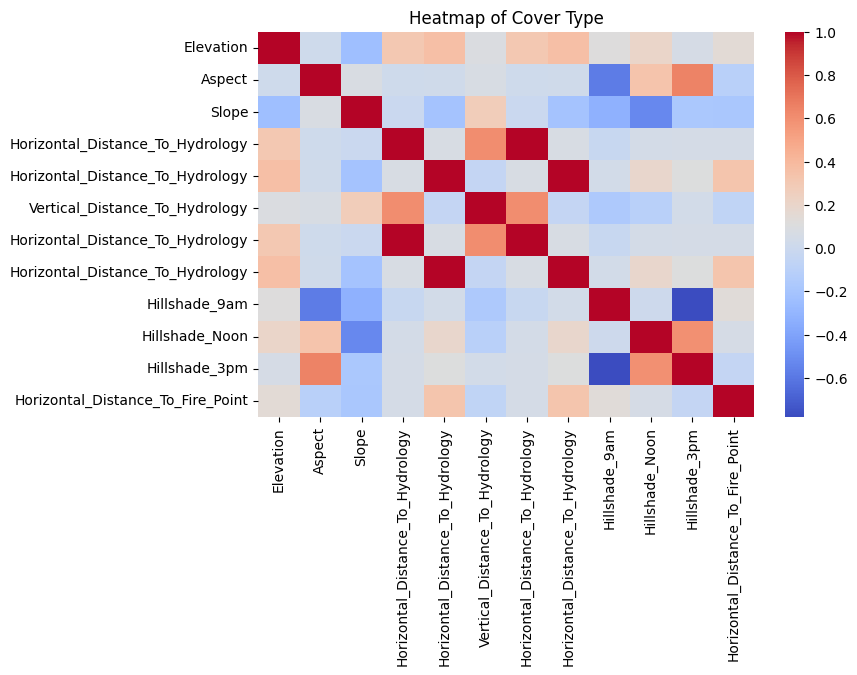

In [22]:
plt.figure(figsize=(8 ,5))
correlation_matrix = df[numerical_features].corr()
sns.heatmap(correlation_matrix,cmap='coolwarm',fmt=".2f",annot=False )
plt.title("Heatmap of Cover Type")
plt.show()

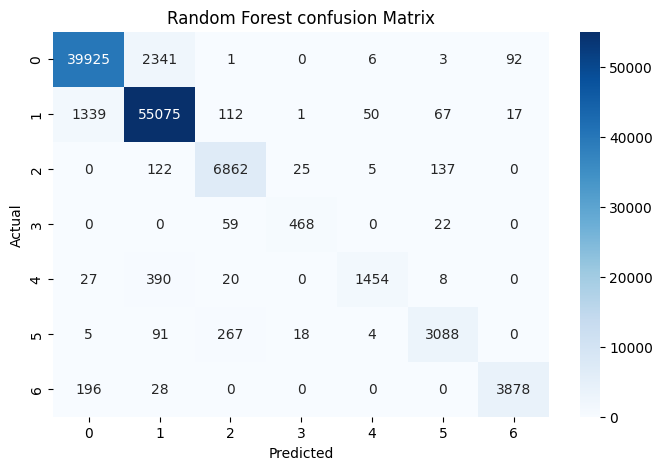

In [23]:
plt.figure(figsize=(8 ,5))
sns.heatmap(confusion_matrix(y_test,rf_pred),annot=True ,cmap = 'Blues',fmt = 'd')
plt.title("Random Forest confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()